## KMeans Clustering

In [1]:
! pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 9.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.preprocessing import StandardScaler

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/TRX-USD.csv',usecols=['Date','Close'])
df = df['Close']

In [4]:
df1 = df.values.reshape(-1, 1)

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

time_step = 100
X, y = create_dataset(df1, time_step)

X = X.reshape(X.shape[0],X.shape[1] , 1)

In [5]:
X.shape

(1916, 100, 1)

In [6]:
seed = 0
np.random.seed(seed)
X = TimeSeriesScalerMeanVariance().fit_transform(X)
sz = X.shape[1]

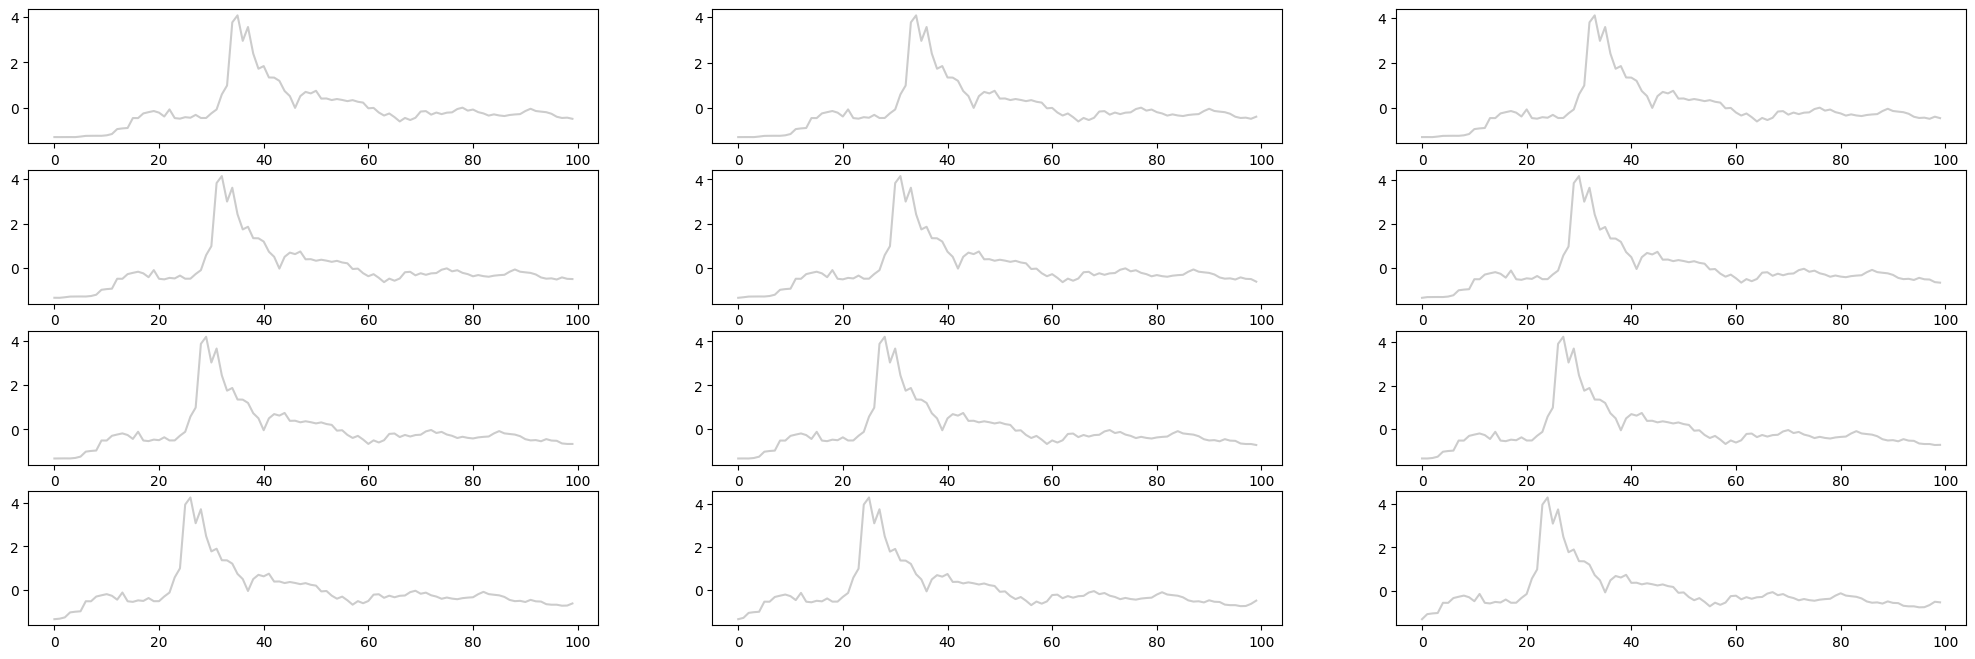

In [7]:
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(X[yi].ravel(), "k-", alpha=.2)

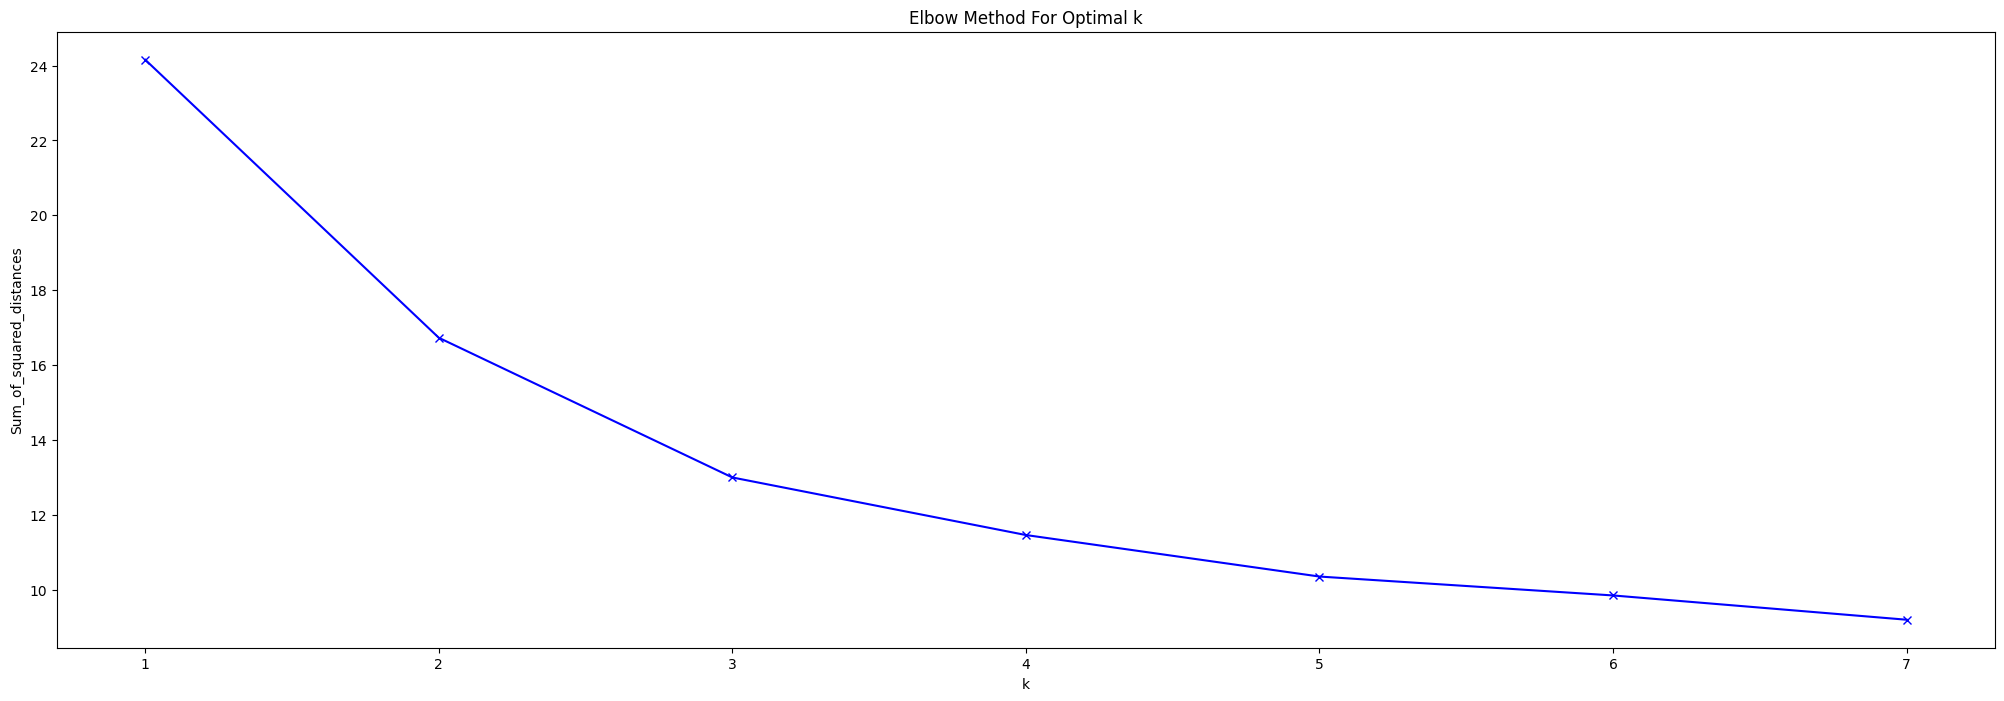

In [8]:
# Using sum of squared distances to decide cluster number
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)

    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

-----Euclidean k-means-----
Euclidean silhoutte: 0.27


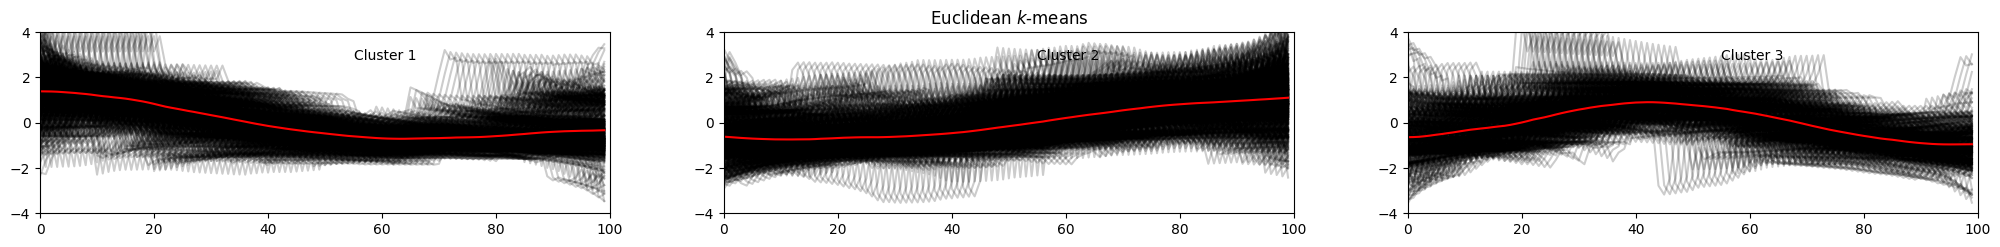

In [9]:
# Euclidean k-means
print("-----Euclidean k-means-----")
n_clusters=3
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=seed)
y_km = km.fit_predict(X)

print("Euclidean silhoutte: {:.2f}".format(silhouette_score(X, y_km, metric="euclidean")))

plt.figure()
for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi + 1)
    for xx in X[y_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [10]:
y_km.shape

(1916,)

DBA k-means
DBA silhoutte: 0.34


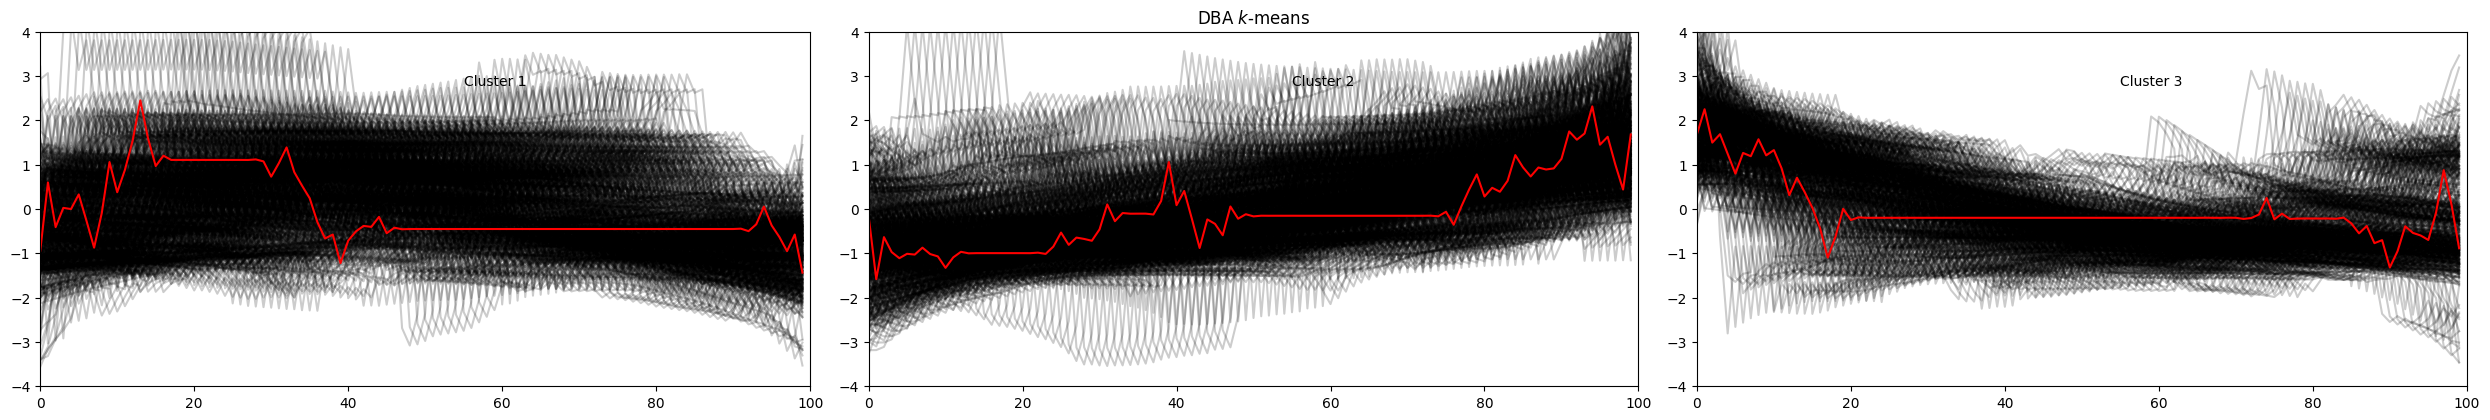

In [11]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=seed)
y_dba_km = dba_km.fit_predict(X)
print("DBA silhoutte: {:.2f}".format(silhouette_score(X, y_dba_km, metric="dtw")))

for yi in range(n_clusters):
    plt.subplot(2, n_clusters, yi+1)
    for xx in X[y_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

plt.tight_layout()
plt.show()

In [12]:
y_dba_km.shape

(1916,)

In [13]:
cluster_labels = dba_km.labels_

cluster_0 = X[cluster_labels == 0]
cluster_1 = X[cluster_labels == 1]
cluster_2 = X[cluster_labels == 2]

In [14]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)

(630, 100, 1)
(760, 100, 1)
(526, 100, 1)


# RNN

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

## 7:2:1

### Cluster 0

In [225]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.7 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (441, 100, 1)
y_train shape: (441,)
X_test shape: (126, 100, 1)
ytest shape: (126,)
X_val shape: (63, 100, 1)
yval shape: (63,)


In [226]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [227]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 280ms/step - loss: 3.6348 - val_loss: 2.1194
Epoch 2/100
7/7 [==============================] - 0s 56ms/step - loss: 1.4435 - val_loss: 0.8660
Epoch 3/100
7/7 [==============================] - 1s 87ms/step - loss: 0.6932 - val_loss: 0.5204
Epoch 4/100
7/7 [==============================] - 1s 81ms/step - loss: 0.4195 - val_loss: 0.3338
Epoch 5/100
7/7 [==============================] - 0s 57ms/step - loss: 0.3036 - val_loss: 0.2549
Epoch 6/100
7/7 [==============================] - 0s 65ms/step - loss: 0.2284 - val_loss: 0.1937
Epoch 7/100
7/7 [==============================] - 0s 60ms/step - loss: 0.1912 - val_loss: 0.1710
Epoch 8/100
7/7 [==============================] - 0s 64ms/step - loss: 0.1683 - val_loss: 0.1598
Epoch 9/100
7/7 [==============================] - 1s 79ms/step - loss: 0.1460 - val_loss: 0.1377
Epoch 10/100
7/7 [==============================] - 0s 64ms/step - loss: 0.1288 - val_loss: 0.1238
Epoch 11/100
7/7 [

In [228]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 18ms/step


In [229]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.6849648809770261
RMSE: 0.8633198909635331
--------------------------
---------TEST----------
MAE: 0.7731305784205967
RMSE: 0.9871736872383858
-------------------


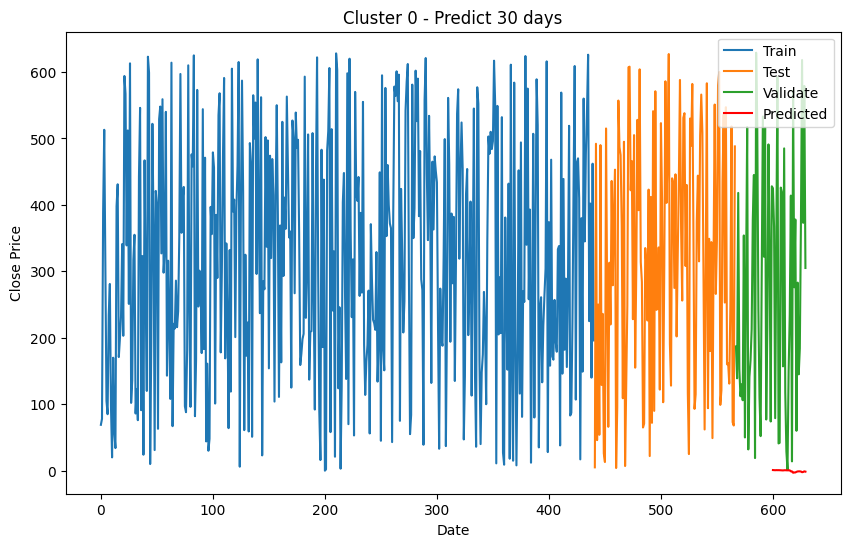

In [230]:
predicted_prices = cluster_0[-30:]
predicted_prices_reshaped = predicted_prices.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices, label='Train')
plt.plot(range(num_train, num_train+len(test_indices)), test_indices, label='Test')
plt.plot(range(num_train+num_test, num_train+num_test+len(val_indices)), val_indices, label='Validate')

plt.plot(range(len(cluster_0) - 30, len(cluster_0)), predicted_prices_reshaped[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 0 - Predict 30 days')
plt.legend()
plt.show()

In [231]:
predicted_prices_reshaped

array([[[ 0.93179187],
        [ 0.78436604],
        [ 0.90082578],
        ...,
        [-1.34377229],
        [-1.03343757],
        [-0.99731046]],

       [[ 0.80322924],
        [ 0.91967153],
        [ 1.01121025],
        ...,
        [-1.01430193],
        [-0.97818024],
        [-0.94744278]],

       [[ 0.68199122],
        [ 0.79765109],
        [ 0.71745691],
        ...,
        [-1.00411292],
        [-0.69847208],
        [-0.72964678]],

       ...,

       [[-1.96559   ],
        [-0.97495849],
        [-1.38149403],
        ...,
        [-0.10491925],
        [ 0.12109857],
        [ 0.45994203]],

       [[-1.01975976],
        [-1.43267648],
        [-1.45259099],
        ...,
        [ 0.09350154],
        [ 0.43766365],
        [ 0.9238447 ]],

       [[-1.45408795],
        [-1.47406372],
        [-1.04291688],
        ...,
        [ 0.4220052 ],
        [ 0.90968171],
        [ 0.66056591]]])

### Cluster 1

In [232]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.7 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train1
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (532, 100, 1)
y_train1shape: (532,)
X_test1 shape: (152, 100, 1)
ytest1 shape: (152,)
X_val1 shape: (76, 100, 1)
yval1 shape: (76,)


In [233]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [234]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 2s 53ms/step - loss: 2.1733 - val_loss: 1.0197
Epoch 2/100
9/9 [==============================] - 0s 25ms/step - loss: 0.6954 - val_loss: 0.6026
Epoch 3/100
9/9 [==============================] - 0s 30ms/step - loss: 0.3860 - val_loss: 0.3977
Epoch 4/100
9/9 [==============================] - 0s 25ms/step - loss: 0.2888 - val_loss: 0.3121
Epoch 5/100
9/9 [==============================] - 0s 27ms/step - loss: 0.2204 - val_loss: 0.2504
Epoch 6/100
9/9 [==============================] - 0s 25ms/step - loss: 0.1777 - val_loss: 0.2152
Epoch 7/100
9/9 [==============================] - 0s 25ms/step - loss: 0.1464 - val_loss: 0.1808
Epoch 8/100
9/9 [==============================] - 0s 26ms/step - loss: 0.1243 - val_loss: 0.1578
Epoch 9/100
9/9 [==============================] - 0s 27ms/step - loss: 0.1091 - val_loss: 0.1379
Epoch 10/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0942 - val_loss: 0.1209
Epoch 11/100
9/9 [=

In [235]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

3/3 [==============================] - 0s 13ms/step


In [236]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 0.9860986018497848
RMSE: 1.2597993929924252
--------------------------
---------TEST----------
MAE: 1.018389776477988
RMSE: 1.3185879518007873
-------------------


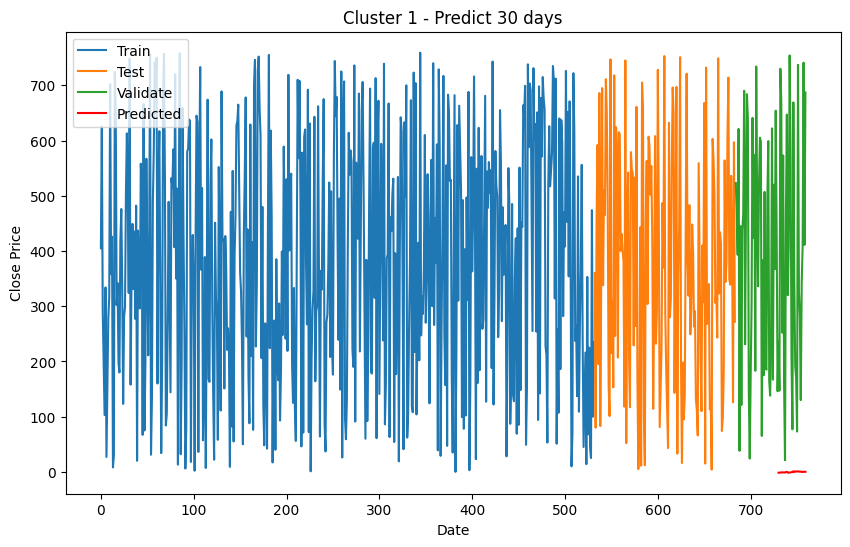

In [237]:
predicted_prices1 = cluster_1[-30:]
predicted_prices_reshaped1 = predicted_prices1.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices1, label='Train')
plt.plot(range(num_train1, num_train1+len(test_indices1)), test_indices1, label='Test')
plt.plot(range(num_train1+num_test1, num_train1+num_test1+len(val_indices1)), val_indices1, label='Validate')
plt.plot(range(len(cluster_1) - 30, len(cluster_1)), predicted_prices_reshaped1[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 1 - Predict 30 days')
plt.legend()
plt.show()

### Cluster 2

In [238]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.7 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (368, 100, 1)
y_train2shape: (368,)
X_test2 shape: (105, 100, 1)
ytest2 shape: (105,)
X_val2 shape: (53, 100, 1)
yval2 shape: (53,)


In [239]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [240]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 2s 71ms/step - loss: 0.7925 - val_loss: 0.4384
Epoch 2/100
6/6 [==============================] - 0s 28ms/step - loss: 0.2088 - val_loss: 0.1689
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1205 - val_loss: 0.1029
Epoch 4/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0759 - val_loss: 0.0916
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0600 - val_loss: 0.0898
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0507 - val_loss: 0.0784
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0421 - val_loss: 0.0641
Epoch 8/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0356 - val_loss: 0.0534
Epoch 9/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0312 - val_loss: 0.0465
Epoch 10/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0279 - val_loss: 0.0429
Epoch 11/100
6/6 [=

In [241]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

2/2 [==============================] - 0s 11ms/step


In [242]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.281664617024506
RMSE: 1.629614865221771
--------------------------
---------TEST----------
MAE: 1.2146505211660414
RMSE: 1.558872773436938
-------------------


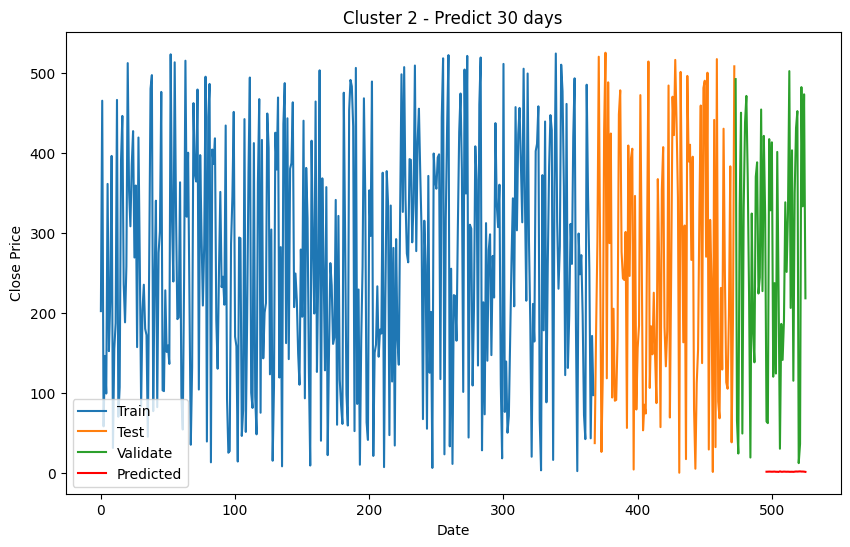

In [243]:
predicted_prices2 = cluster_2[-30:]
predicted_prices_reshaped2 = predicted_prices2.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices2, label='Train')
plt.plot(range(num_train2, num_train2+len(test_indices2)), test_indices2, label='Test')
plt.plot(range(num_train2+num_test2, num_train2+num_test2+len(val_indices2)), val_indices2, label='Validate')
plt.plot(range(len(cluster_2) - 30, len(cluster_2)), predicted_prices_reshaped2[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 2 - Predict 30 days')
plt.legend()
plt.show()

###MAE - RMSE

In [244]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 0.984242699950439
Validate rmse: 1.250911383059243
---------------------------
---------TEST--------------
Test mae: 1.0020569586882087
Test rmse: 1.2882114708253705
---------------------------


## 5:3:2

### Cluster 0

In [245]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.5 * num_samples)
num_test = int(0.3 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (315, 100, 1)
y_train shape: (315,)
X_test shape: (189, 100, 1)
ytest shape: (189,)
X_val shape: (126, 100, 1)
yval shape: (126,)


In [246]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [247]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 85ms/step - loss: 1.5318 - val_loss: 1.1560
Epoch 2/100
5/5 [==============================] - 0s 30ms/step - loss: 0.6553 - val_loss: 0.6225
Epoch 3/100
5/5 [==============================] - 0s 62ms/step - loss: 0.3528 - val_loss: 0.3753
Epoch 4/100
5/5 [==============================] - 0s 52ms/step - loss: 0.2198 - val_loss: 0.2787
Epoch 5/100
5/5 [==============================] - 0s 55ms/step - loss: 0.1697 - val_loss: 0.2232
Epoch 6/100
5/5 [==============================] - 0s 51ms/step - loss: 0.1340 - val_loss: 0.1941
Epoch 7/100
5/5 [==============================] - 0s 58ms/step - loss: 0.1175 - val_loss: 0.1716
Epoch 8/100
5/5 [==============================] - 0s 53ms/step - loss: 0.1018 - val_loss: 0.1556
Epoch 9/100
5/5 [==============================] - 0s 51ms/step - loss: 0.0928 - val_loss: 0.1410
Epoch 10/100
5/5 [==============================] - 0s 55ms/step - loss: 0.0822 - val_loss: 0.1310
Epoch 11/100
5/5 [=

In [248]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

4/4 [==============================] - 0s 7ms/step


In [249]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.7928995346384677
RMSE: 1.007025723223147
--------------------------
---------TEST----------
MAE: 0.8363503750256511
RMSE: 1.0665214359304123
-------------------


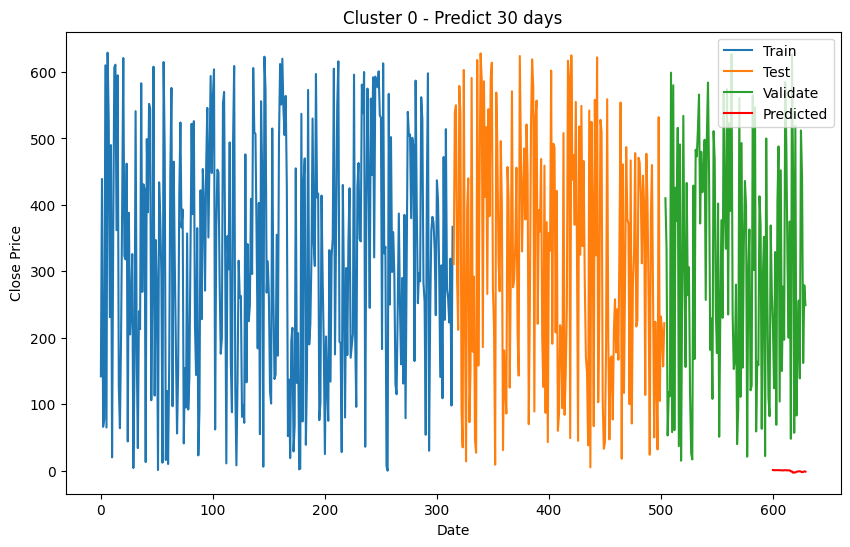

In [250]:
predicted_prices = cluster_0[-30:]
predicted_prices_reshaped = predicted_prices.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices, label='Train')
plt.plot(range(num_train, num_train+len(test_indices)), test_indices, label='Test')
plt.plot(range(num_train+num_test, num_train+num_test+len(val_indices)), val_indices, label='Validate')

plt.plot(range(len(cluster_0) - 30, len(cluster_0)), predicted_prices_reshaped[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 0 - Predict 30 days')
plt.legend()
plt.show()

### Cluster 1

In [251]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.5 * num_samples1)
num_test1 = int(0.3 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (380, 100, 1)
y_train1shape: (380,)
X_test1 shape: (228, 100, 1)
ytest1 shape: (228,)
X_val1 shape: (152, 100, 1)
yval1 shape: (152,)


In [252]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [253]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 2s 123ms/step - loss: 1.4990 - val_loss: 0.5124
Epoch 2/100
6/6 [==============================] - 0s 51ms/step - loss: 0.4940 - val_loss: 0.4668
Epoch 3/100
6/6 [==============================] - 0s 48ms/step - loss: 0.3835 - val_loss: 0.2635
Epoch 4/100
6/6 [==============================] - 0s 61ms/step - loss: 0.2586 - val_loss: 0.2785
Epoch 5/100
6/6 [==============================] - 0s 49ms/step - loss: 0.2406 - val_loss: 0.2223
Epoch 6/100
6/6 [==============================] - 0s 52ms/step - loss: 0.1987 - val_loss: 0.2003
Epoch 7/100
6/6 [==============================] - 0s 52ms/step - loss: 0.1756 - val_loss: 0.1729
Epoch 8/100
6/6 [==============================] - 0s 56ms/step - loss: 0.1492 - val_loss: 0.1590
Epoch 9/100
6/6 [==============================] - 0s 53ms/step - loss: 0.1360 - val_loss: 0.1368
Epoch 10/100
6/6 [==============================] - 0s 29ms/step - loss: 0.1183 - val_loss: 0.1218
Epoch 11/100
6/6 [

In [254]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

5/5 [==============================] - 0s 10ms/step


In [255]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 0.9770079293325605
RMSE: 1.256344816742551
--------------------------
---------TEST----------
MAE: 0.991339368258761
RMSE: 1.270304122948528
-------------------


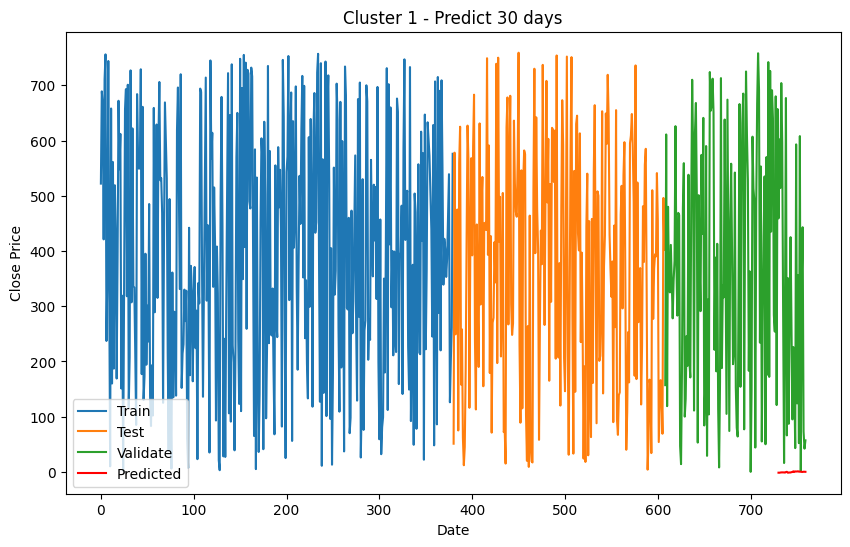

In [256]:
predicted_prices1 = cluster_1[-30:]
predicted_prices_reshaped1 = predicted_prices1.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices1, label='Train')
plt.plot(range(num_train1, num_train1+len(test_indices1)), test_indices1, label='Test')
plt.plot(range(num_train1+num_test1, num_train1+num_test1+len(val_indices1)), val_indices1, label='Validate')
plt.plot(range(len(cluster_1) - 30, len(cluster_1)), predicted_prices_reshaped1[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 1 - Predict 30 days')
plt.legend()
plt.show()

### Cluster 2

In [257]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.5 * num_samples2)
num_test2 = int(0.3 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (263, 100, 1)
y_train2shape: (263,)
X_test2 shape: (157, 100, 1)
ytest2 shape: (157,)
X_val2 shape: (106, 100, 1)
yval2 shape: (106,)


In [258]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [259]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
5/5 [==============================] - 2s 87ms/step - loss: 1.3348 - val_loss: 0.7797
Epoch 2/100
5/5 [==============================] - 0s 31ms/step - loss: 0.4138 - val_loss: 0.4552
Epoch 3/100
5/5 [==============================] - 0s 32ms/step - loss: 0.2224 - val_loss: 0.2974
Epoch 4/100
5/5 [==============================] - 0s 33ms/step - loss: 0.1393 - val_loss: 0.2000
Epoch 5/100
5/5 [==============================] - 0s 33ms/step - loss: 0.1079 - val_loss: 0.1304
Epoch 6/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0641 - val_loss: 0.1002
Epoch 7/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0486 - val_loss: 0.0809
Epoch 8/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0399 - val_loss: 0.0779
Epoch 9/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0390 - val_loss: 0.0705
Epoch 10/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0341 - val_loss: 0.0622
Epoch 11/100
5/5 [=

In [260]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

4/4 [==============================] - 0s 8ms/step


In [261]:
print('---------VALIDATE----------')
valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.1571477576401041
RMSE: 1.4976605054635852
--------------------------
---------TEST----------
MAE: 1.1695154430212855
RMSE: 1.4887326673060997
-------------------


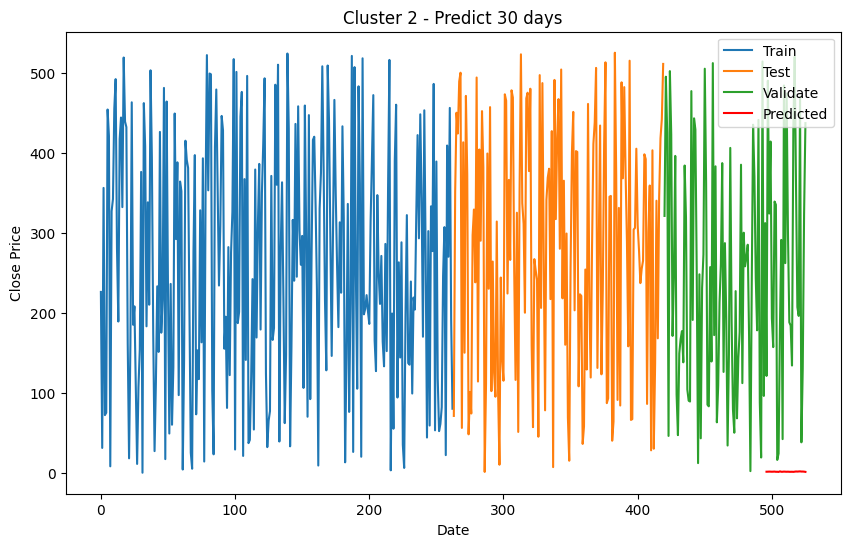

In [262]:
predicted_prices2 = cluster_2[-30:]
predicted_prices_reshaped2 = predicted_prices2.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices2, label='Train')
plt.plot(range(num_train2, num_train2+len(test_indices2)), test_indices2, label='Test')
plt.plot(range(num_train2+num_test2, num_train2+num_test2+len(val_indices2)), val_indices2, label='Validate')
plt.plot(range(len(cluster_2) - 30, len(cluster_2)), predicted_prices_reshaped2[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 2 - Predict 30 days')
plt.legend()
plt.show()

###MAE - RMSE

In [263]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 0.9756850738703774
Validate rmse: 1.2536770151430945
---------------------------
---------TEST--------------
Test mae: 0.9990683954352325
Test rmse: 1.2751860753950133
---------------------------


## 6:2:2

### Cluster 0

In [264]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.6 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (378, 100, 1)
y_train shape: (378,)
X_test shape: (126, 100, 1)
ytest shape: (126,)
X_val shape: (126, 100, 1)
yval shape: (126,)


In [265]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [266]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 2s 75ms/step - loss: 0.5385 - val_loss: 0.2427
Epoch 2/100
6/6 [==============================] - 0s 30ms/step - loss: 0.1668 - val_loss: 0.1389
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1115 - val_loss: 0.1217
Epoch 4/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0895 - val_loss: 0.1046
Epoch 5/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0700 - val_loss: 0.0744
Epoch 6/100
6/6 [==============================] - 0s 43ms/step - loss: 0.0583 - val_loss: 0.0636
Epoch 7/100
6/6 [==============================] - 1s 168ms/step - loss: 0.0499 - val_loss: 0.0587
Epoch 8/100
6/6 [==============================] - 1s 88ms/step - loss: 0.0447 - val_loss: 0.0520
Epoch 9/100
6/6 [==============================] - 0s 58ms/step - loss: 0.0393 - val_loss: 0.0455
Epoch 10/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0357 - val_loss: 0.0416
Epoch 11/100
6/6 [

In [267]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

4/4 [==============================] - 0s 7ms/step


In [268]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.8008869839415123
RMSE: 1.012831510448566
--------------------------
---------TEST----------
MAE: 0.7638161286741986
RMSE: 0.992467380977953
-------------------


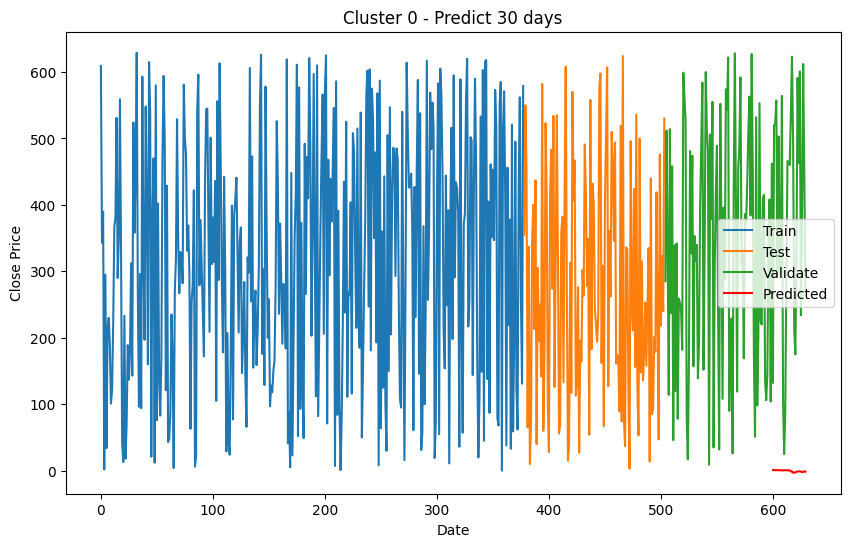

In [269]:
predicted_prices = cluster_0[-30:]
predicted_prices_reshaped = predicted_prices.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices, label='Train')
plt.plot(range(num_train, num_train+len(test_indices)), test_indices, label='Test')
plt.plot(range(num_train+num_test, num_train+num_test+len(val_indices)), val_indices, label='Validate')

plt.plot(range(len(cluster_0) - 30, len(cluster_0)), predicted_prices_reshaped[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 0 - Predict 30 days')
plt.legend()
plt.show()

### Cluster 1

In [270]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.6 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (456, 100, 1)
y_train1shape: (456,)
X_test1 shape: (152, 100, 1)
ytest1 shape: (152,)
X_val1 shape: (152, 100, 1)
yval1 shape: (152,)


In [271]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [272]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 2s 58ms/step - loss: 2.3318 - val_loss: 1.1593
Epoch 2/100
8/8 [==============================] - 0s 25ms/step - loss: 0.8248 - val_loss: 0.6559
Epoch 3/100
8/8 [==============================] - 0s 30ms/step - loss: 0.4931 - val_loss: 0.4985
Epoch 4/100
8/8 [==============================] - 0s 27ms/step - loss: 0.3576 - val_loss: 0.4106
Epoch 5/100
8/8 [==============================] - 0s 26ms/step - loss: 0.3092 - val_loss: 0.3754
Epoch 6/100
8/8 [==============================] - 0s 27ms/step - loss: 0.2649 - val_loss: 0.3233
Epoch 7/100
8/8 [==============================] - 0s 26ms/step - loss: 0.2323 - val_loss: 0.2970
Epoch 8/100
8/8 [==============================] - 0s 28ms/step - loss: 0.2068 - val_loss: 0.2732
Epoch 9/100
8/8 [==============================] - 0s 25ms/step - loss: 0.1921 - val_loss: 0.2527
Epoch 10/100
8/8 [==============================] - 0s 34ms/step - loss: 0.1735 - val_loss: 0.2340
Epoch 11/100
8/8 [=

In [273]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

5/5 [==============================] - 0s 7ms/step


In [274]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 0.9959015445360623
RMSE: 1.2985040104362218
--------------------------
---------TEST----------
MAE: 1.0129462590484095
RMSE: 1.320960229669457
-------------------


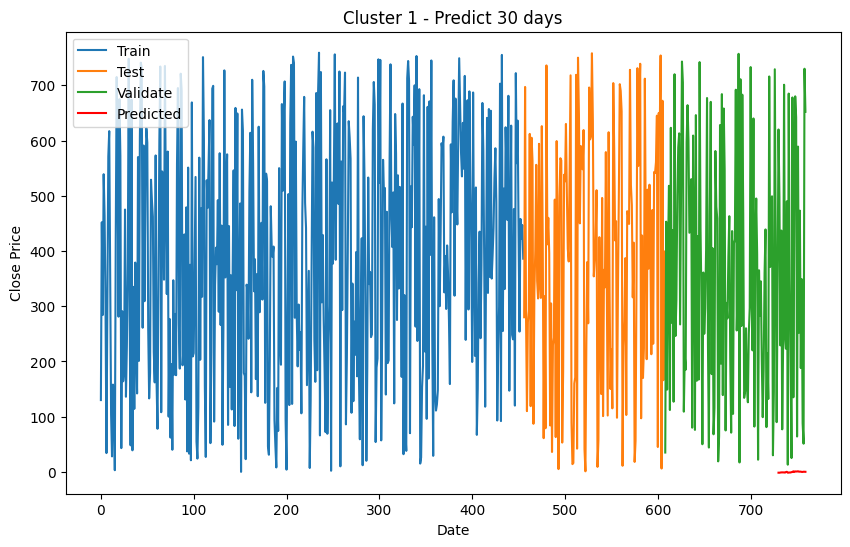

In [275]:
predicted_prices1 = cluster_1[-30:]
predicted_prices_reshaped1 = predicted_prices1.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices1, label='Train')
plt.plot(range(num_train1, num_train1+len(test_indices1)), test_indices1, label='Test')
plt.plot(range(num_train1+num_test1, num_train1+num_test1+len(val_indices1)), val_indices1, label='Validate')
plt.plot(range(len(cluster_1) - 30, len(cluster_1)), predicted_prices_reshaped1[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 1 - Predict 30 days')
plt.legend()
plt.show()

### Cluster 2

In [276]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.6 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (315, 100, 1)
y_train2shape: (315,)
X_test2 shape: (105, 100, 1)
ytest2 shape: (105,)
X_val2 shape: (106, 100, 1)
yval2 shape: (106,)


In [277]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [278]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 83ms/step - loss: 1.2117 - val_loss: 0.4453
Epoch 2/100
5/5 [==============================] - 0s 30ms/step - loss: 0.2893 - val_loss: 0.3135
Epoch 3/100
5/5 [==============================] - 0s 27ms/step - loss: 0.1880 - val_loss: 0.1588
Epoch 4/100
5/5 [==============================] - 0s 33ms/step - loss: 0.1101 - val_loss: 0.0982
Epoch 5/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0973 - val_loss: 0.0862
Epoch 6/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0708 - val_loss: 0.0653
Epoch 7/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0572 - val_loss: 0.0654
Epoch 8/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0497 - val_loss: 0.0532
Epoch 9/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0404 - val_loss: 0.0457
Epoch 10/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0339 - val_loss: 0.0375
Epoch 11/100
5/5 [=

In [279]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

4/4 [==============================] - 0s 7ms/step


In [280]:
print('---------VALIDATE----------')
valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.088292608000158
RMSE: 1.3844222654263905
--------------------------
---------TEST----------
MAE: 1.1454536386577903
RMSE: 1.474167263567005
-------------------


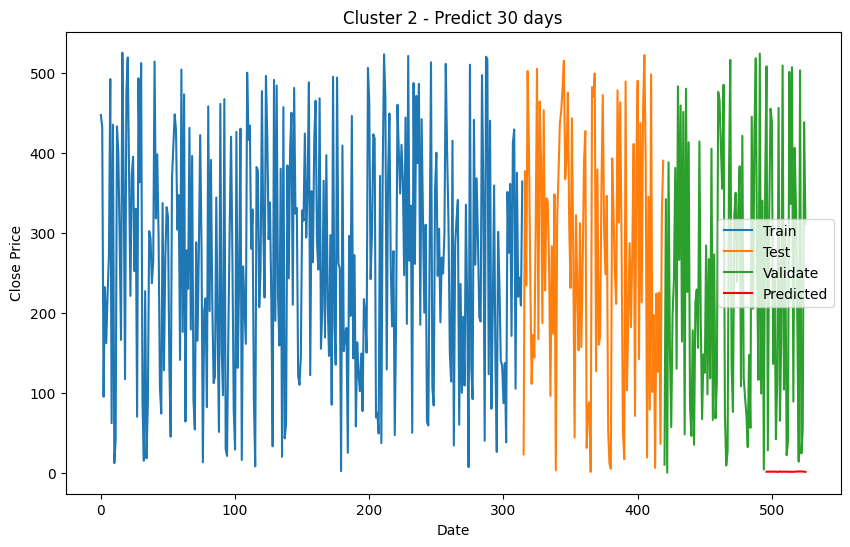

In [281]:
predicted_prices2 = cluster_2[-30:]
predicted_prices_reshaped2 = predicted_prices2.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices2, label='Train')
plt.plot(range(num_train2, num_train2+len(test_indices2)), test_indices2, label='Test')
plt.plot(range(num_train2+num_test2, num_train2+num_test2+len(val_indices2)), val_indices2, label='Validate')
plt.plot(range(len(cluster_2) - 30, len(cluster_2)), predicted_prices_reshaped2[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 2 - Predict 30 days')
plt.legend()
plt.show()

###MAE - RMSE

In [282]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 0.9616937121592443
Validate rmse: 1.231919262103726
---------------------------
---------TEST--------------
Test mae: 0.974072008793466
Test rmse: 1.2625316247381384
---------------------------


# LSTM

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

## 7:2:1

### Cluster 0

In [74]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.7 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (441, 100, 1)
y_train shape: (441,)
X_test shape: (126, 100, 1)
ytest shape: (126,)
X_val shape: (63, 100, 1)
yval shape: (63,)


In [75]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 10s 521ms/step - loss: 0.9842 - val_loss: 0.4676
Epoch 2/100
7/7 [==============================] - 2s 325ms/step - loss: 0.5347 - val_loss: 0.3175
Epoch 3/100
7/7 [==============================] - 1s 190ms/step - loss: 0.3578 - val_loss: 0.2591
Epoch 4/100
7/7 [==============================] - 1s 191ms/step - loss: 0.2605 - val_loss: 0.2485
Epoch 5/100
7/7 [==============================] - 1s 196ms/step - loss: 0.2460 - val_loss: 0.2238
Epoch 6/100
7/7 [==============================] - 1s 191ms/step - loss: 0.2164 - val_loss: 0.1949
Epoch 7/100
7/7 [==============================] - 1s 190ms/step - loss: 0.1982 - val_loss: 0.1794
Epoch 8/100
7/7 [==============================] - 1s 186ms/step - loss: 0.1852 - val_loss: 0.1681
Epoch 9/100
7/7 [==============================] - 1s 188ms/step - loss: 0.1721 - val_loss: 0.1702
Epoch 10/100
7/7 [==============================] - 2s 272ms/step - loss: 0.1655 - val_loss: 0.1585
Epoch 11

In [77]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 38ms/step


In [78]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.8159787290705924
RMSE: 1.02831503199266
--------------------------
---------TEST----------
MAE: 0.747042359537961
RMSE: 0.9654151967755399
-------------------


### Cluster 1

In [79]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.7 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train1
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (532, 100, 1)
y_train1shape: (532,)
X_test1 shape: (152, 100, 1)
ytest1 shape: (152,)
X_val1 shape: (76, 100, 1)
yval1 shape: (76,)


In [80]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [81]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 10s 400ms/step - loss: 1.5051 - val_loss: 1.2881
Epoch 2/100
9/9 [==============================] - 2s 184ms/step - loss: 0.8786 - val_loss: 1.0826
Epoch 3/100
9/9 [==============================] - 2s 184ms/step - loss: 0.6945 - val_loss: 0.8621
Epoch 4/100
9/9 [==============================] - 2s 185ms/step - loss: 0.5909 - val_loss: 0.7508
Epoch 5/100
9/9 [==============================] - 2s 187ms/step - loss: 0.5162 - val_loss: 0.6760
Epoch 6/100
9/9 [==============================] - 2s 212ms/step - loss: 0.4771 - val_loss: 0.6176
Epoch 7/100
9/9 [==============================] - 3s 310ms/step - loss: 0.4234 - val_loss: 0.5577
Epoch 8/100
9/9 [==============================] - 2s 223ms/step - loss: 0.3759 - val_loss: 0.4895
Epoch 9/100
9/9 [==============================] - 2s 184ms/step - loss: 0.3233 - val_loss: 0.4349
Epoch 10/100
9/9 [==============================] - 2s 185ms/step - loss: 0.2831 - val_loss: 0.3799
Epoch 11

In [82]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

3/3 [==============================] - 0s 33ms/step


In [83]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 0.976567183009934
RMSE: 1.289802619056049
--------------------------
---------TEST----------
MAE: 0.9370900166682996
RMSE: 1.2527356323364525
-------------------


### Cluster 2

In [84]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.7 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (368, 100, 1)
y_train2shape: (368,)
X_test2 shape: (105, 100, 1)
ytest2 shape: (105,)
X_val2 shape: (53, 100, 1)
yval2 shape: (53,)


In [85]:
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [86]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 10s 571ms/step - loss: 0.8392 - val_loss: 0.6555
Epoch 2/100
6/6 [==============================] - 1s 188ms/step - loss: 0.4975 - val_loss: 0.4275
Epoch 3/100
6/6 [==============================] - 1s 187ms/step - loss: 0.3601 - val_loss: 0.2960
Epoch 4/100
6/6 [==============================] - 1s 190ms/step - loss: 0.2703 - val_loss: 0.2345
Epoch 5/100
6/6 [==============================] - 1s 185ms/step - loss: 0.2198 - val_loss: 0.2194
Epoch 6/100
6/6 [==============================] - 1s 185ms/step - loss: 0.1836 - val_loss: 0.2078
Epoch 7/100
6/6 [==============================] - 1s 189ms/step - loss: 0.1549 - val_loss: 0.1823
Epoch 8/100
6/6 [==============================] - 1s 185ms/step - loss: 0.1282 - val_loss: 0.1637
Epoch 9/100
6/6 [==============================] - 1s 185ms/step - loss: 0.1118 - val_loss: 0.1523
Epoch 10/100
6/6 [==============================] - 2s 316ms/step - loss: 0.0979 - val_loss: 0.1344
Epoch 11

In [87]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

2/2 [==============================] - 0s 46ms/step


In [88]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.3023411065602244
RMSE: 1.620877891901576
--------------------------
---------TEST----------
MAE: 1.1821424528189304
RMSE: 1.4791110475696996
-------------------


###MAE - RMSE

In [89]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.0316290062135836
Validate rmse: 1.3129985143167617
---------------------------
---------TEST--------------
Test mae: 0.9554249430083971
Test rmse: 1.2324206255605639
---------------------------


## 5:3:2

### Cluster 0

In [90]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.5 * num_samples)
num_test = int(0.3 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (315, 100, 1)
y_train shape: (315,)
X_test shape: (189, 100, 1)
ytest shape: (189,)
X_val shape: (126, 100, 1)
yval shape: (126,)


In [91]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [92]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
5/5 [==============================] - 8s 528ms/step - loss: 1.1736 - val_loss: 0.6170
Epoch 2/100
5/5 [==============================] - 1s 215ms/step - loss: 0.5628 - val_loss: 0.5505
Epoch 3/100
5/5 [==============================] - 1s 219ms/step - loss: 0.4155 - val_loss: 0.3266
Epoch 4/100
5/5 [==============================] - 1s 303ms/step - loss: 0.3061 - val_loss: 0.2775
Epoch 5/100
5/5 [==============================] - 2s 369ms/step - loss: 0.2521 - val_loss: 0.2792
Epoch 6/100
5/5 [==============================] - 2s 346ms/step - loss: 0.2493 - val_loss: 0.2547
Epoch 7/100
5/5 [==============================] - 1s 216ms/step - loss: 0.2256 - val_loss: 0.2259
Epoch 8/100
5/5 [==============================] - 1s 213ms/step - loss: 0.2028 - val_loss: 0.2288
Epoch 9/100
5/5 [==============================] - 1s 219ms/step - loss: 0.1858 - val_loss: 0.1946
Epoch 10/100
5/5 [==============================] - 1s 216ms/step - loss: 0.1789 - val_loss: 0.1886
Epoch 11/

In [93]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

4/4 [==============================] - 0s 56ms/step


In [94]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.7687656858800974
RMSE: 0.9780233712810894
--------------------------
---------TEST----------
MAE: 0.7880970946150899
RMSE: 1.0217803831188876
-------------------


### Cluster 1

In [95]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.5 * num_samples1)
num_test1 = int(0.3 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (380, 100, 1)
y_train1shape: (380,)
X_test1 shape: (228, 100, 1)
ytest1 shape: (228,)
X_val1 shape: (152, 100, 1)
yval1 shape: (152,)


In [96]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [97]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 9s 455ms/step - loss: 1.6778 - val_loss: 1.4510
Epoch 2/100
6/6 [==============================] - 2s 415ms/step - loss: 0.8973 - val_loss: 1.2388
Epoch 3/100
6/6 [==============================] - 2s 348ms/step - loss: 0.7763 - val_loss: 1.1023
Epoch 4/100
6/6 [==============================] - 1s 213ms/step - loss: 0.7201 - val_loss: 0.9735
Epoch 5/100
6/6 [==============================] - 1s 213ms/step - loss: 0.6290 - val_loss: 0.8250
Epoch 6/100
6/6 [==============================] - 1s 211ms/step - loss: 0.5465 - val_loss: 0.7669
Epoch 7/100
6/6 [==============================] - 1s 211ms/step - loss: 0.5085 - val_loss: 0.6766
Epoch 8/100
6/6 [==============================] - 1s 234ms/step - loss: 0.4682 - val_loss: 0.6400
Epoch 9/100
6/6 [==============================] - 1s 211ms/step - loss: 0.4360 - val_loss: 0.5823
Epoch 10/100
6/6 [==============================] - 1s 212ms/step - loss: 0.4044 - val_loss: 0.5411
Epoch 11/

In [98]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

5/5 [==============================] - 0s 39ms/step


In [99]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 0.9094241777798132
RMSE: 1.1944694357610166
--------------------------
---------TEST----------
MAE: 1.0123077231285555
RMSE: 1.3566557087692392
-------------------


### Cluster 2

In [100]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.5 * num_samples2)
num_test2 = int(0.3 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (263, 100, 1)
y_train2shape: (263,)
X_test2 shape: (157, 100, 1)
ytest2 shape: (157,)
X_val2 shape: (106, 100, 1)
yval2 shape: (106,)


In [101]:
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [102]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
5/5 [==============================] - 9s 503ms/step - loss: 1.0552 - val_loss: 0.7751
Epoch 2/100
5/5 [==============================] - 1s 198ms/step - loss: 0.6719 - val_loss: 0.5728
Epoch 3/100
5/5 [==============================] - 1s 200ms/step - loss: 0.4682 - val_loss: 0.4719
Epoch 4/100
5/5 [==============================] - 1s 201ms/step - loss: 0.3514 - val_loss: 0.4108
Epoch 5/100
5/5 [==============================] - 1s 199ms/step - loss: 0.3124 - val_loss: 0.3862
Epoch 6/100
5/5 [==============================] - 1s 201ms/step - loss: 0.2823 - val_loss: 0.3490
Epoch 7/100
5/5 [==============================] - 1s 199ms/step - loss: 0.2638 - val_loss: 0.2913
Epoch 8/100
5/5 [==============================] - 1s 291ms/step - loss: 0.2402 - val_loss: 0.2769
Epoch 9/100
5/5 [==============================] - 2s 330ms/step - loss: 0.2168 - val_loss: 0.2655
Epoch 10/100
5/5 [==============================] - 2s 352ms/step - loss: 0.1984 - val_loss: 0.2500
Epoch 11/

In [103]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

4/4 [==============================] - 0s 36ms/step


In [104]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.1978172803759257
RMSE: 1.5374929616526727
--------------------------
---------TEST----------
MAE: 1.1608495390361342
RMSE: 1.4827908528290292
-------------------


###MAE - RMSE

In [105]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 0.9586690480119454
Validate rmse: 1.2366619228982596
---------------------------
---------TEST--------------
Test mae: 0.98708478559326
Test rmse: 1.2870756482390522
---------------------------


## 6:2:2

### Cluster 0

In [106]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.6 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (378, 100, 1)
y_train shape: (378,)
X_test shape: (126, 100, 1)
ytest shape: (126,)
X_val shape: (126, 100, 1)
yval shape: (126,)


In [107]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [108]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 10s 581ms/step - loss: 1.1012 - val_loss: 0.5625
Epoch 2/100
6/6 [==============================] - 2s 321ms/step - loss: 0.5794 - val_loss: 0.3535
Epoch 3/100
6/6 [==============================] - 1s 219ms/step - loss: 0.4053 - val_loss: 0.2660
Epoch 4/100
6/6 [==============================] - 1s 192ms/step - loss: 0.3092 - val_loss: 0.2083
Epoch 5/100
6/6 [==============================] - 1s 191ms/step - loss: 0.2926 - val_loss: 0.1901
Epoch 6/100
6/6 [==============================] - 1s 200ms/step - loss: 0.2497 - val_loss: 0.1595
Epoch 7/100
6/6 [==============================] - 2s 353ms/step - loss: 0.2304 - val_loss: 0.1456
Epoch 8/100
6/6 [==============================] - 2s 324ms/step - loss: 0.2104 - val_loss: 0.1333
Epoch 9/100
6/6 [==============================] - 1s 209ms/step - loss: 0.1959 - val_loss: 0.1222
Epoch 10/100
6/6 [==============================] - 1s 190ms/step - loss: 0.1825 - val_loss: 0.1138
Epoch 11

In [109]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

4/4 [==============================] - 0s 39ms/step


In [110]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.7094404921820148
RMSE: 0.9009674974996291
--------------------------
---------TEST----------
MAE: 0.7995707750043411
RMSE: 1.0059173962380892
-------------------


### Cluster 1

In [111]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.6 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (456, 100, 1)
y_train1shape: (456,)
X_test1 shape: (152, 100, 1)
ytest1 shape: (152,)
X_val1 shape: (152, 100, 1)
yval1 shape: (152,)


In [112]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [113]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 11s 529ms/step - loss: 2.1623 - val_loss: 0.9851
Epoch 2/100
8/8 [==============================] - 1s 184ms/step - loss: 1.0576 - val_loss: 0.8227
Epoch 3/100
8/8 [==============================] - 1s 185ms/step - loss: 0.8240 - val_loss: 0.7186
Epoch 4/100
8/8 [==============================] - 1s 183ms/step - loss: 0.7231 - val_loss: 0.6286
Epoch 5/100
8/8 [==============================] - 1s 188ms/step - loss: 0.6536 - val_loss: 0.5807
Epoch 6/100
8/8 [==============================] - 1s 186ms/step - loss: 0.6440 - val_loss: 0.5423
Epoch 7/100
8/8 [==============================] - 1s 183ms/step - loss: 0.5393 - val_loss: 0.4791
Epoch 8/100
8/8 [==============================] - 2s 268ms/step - loss: 0.4894 - val_loss: 0.4443
Epoch 9/100
8/8 [==============================] - 2s 312ms/step - loss: 0.4832 - val_loss: 0.3998
Epoch 10/100
8/8 [==============================] - 2s 189ms/step - loss: 0.4229 - val_loss: 0.3656
Epoch 11

In [114]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

5/5 [==============================] - 0s 36ms/step


In [115]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 0.8978639759791093
RMSE: 1.1984466397670752
--------------------------
---------TEST----------
MAE: 0.9306627397309697
RMSE: 1.2135569096067522
-------------------


### Cluster 2

In [116]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.6 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (315, 100, 1)
y_train2shape: (315,)
X_test2 shape: (105, 100, 1)
ytest2 shape: (105,)
X_val2 shape: (106, 100, 1)
yval2 shape: (106,)


In [117]:
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [118]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
5/5 [==============================] - 8s 500ms/step - loss: 0.9325 - val_loss: 0.5024
Epoch 2/100
5/5 [==============================] - 1s 281ms/step - loss: 0.5748 - val_loss: 0.4127
Epoch 3/100
5/5 [==============================] - 2s 333ms/step - loss: 0.3856 - val_loss: 0.4129
Epoch 4/100
5/5 [==============================] - 2s 331ms/step - loss: 0.3373 - val_loss: 0.4041
Epoch 5/100
5/5 [==============================] - 1s 198ms/step - loss: 0.2874 - val_loss: 0.2899
Epoch 6/100
5/5 [==============================] - 1s 207ms/step - loss: 0.2425 - val_loss: 0.2172
Epoch 7/100
5/5 [==============================] - 1s 199ms/step - loss: 0.2260 - val_loss: 0.2043
Epoch 8/100
5/5 [==============================] - 1s 205ms/step - loss: 0.2055 - val_loss: 0.1958
Epoch 9/100
5/5 [==============================] - 1s 200ms/step - loss: 0.1850 - val_loss: 0.1837
Epoch 10/100
5/5 [==============================] - 1s 200ms/step - loss: 0.1687 - val_loss: 0.1679
Epoch 11/

In [119]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

4/4 [==============================] - 0s 51ms/step


In [120]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.0616714709494715
RMSE: 1.4017450329357688
--------------------------
---------TEST----------
MAE: 1.0850646936143808
RMSE: 1.3899900712351498
-------------------


###MAE - RMSE

In [121]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 0.8896586463701985
Validate rmse: 1.1670530567341577
---------------------------
---------TEST--------------
Test mae: 0.9384327361165639
Test rmse: 1.203154792359997
---------------------------


# DNN

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

## 7:2:1

### Cluster 0

In [123]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.7 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (441, 100, 1)
y_train shape: (441,)
X_test shape: (126, 100, 1)
ytest shape: (126,)
X_val shape: (63, 100, 1)
yval shape: (63,)


In [124]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [125]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

loss = model.evaluate(X_test, ytest)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.5891
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3595
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2379
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1886
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1492
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1223
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0864
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0736
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 13/100
7/7 [==============================] - 0s 4ms/st

In [126]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

2/2 [==============================] - 0s 5ms/step


In [127]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.7956143864912235
RMSE: 1.0179258048957542
--------------------------
---------TEST----------
MAE: 0.8023971361483134
RMSE: 1.027391463457366
-------------------


### Cluster 1

In [128]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.7 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train1
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (532, 100, 1)
y_train1shape: (532,)
X_test1 shape: (152, 100, 1)
ytest1 shape: (152,)
X_val1 shape: (76, 100, 1)
yval1 shape: (76,)


In [129]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [130]:
model1.fit(X_train1, y_train1, epochs=100, batch_size=64)

loss = model1.evaluate(X_test1, ytest1)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
9/9 [==============================] - 1s 164ms/step - loss: 0.0011
Epoch 2/100
9/9 [==============================] - 2s 233ms/step - loss: 7.1630e-04
Epoch 3/100
9/9 [==============================] - 3s 281ms/step - loss: 5.3977e-04
Epoch 4/100
9/9 [==============================] - 2s 169ms/step - loss: 2.7203e-04
Epoch 5/100
9/9 [==============================] - 1s 164ms/step - loss: 3.5276e-04
Epoch 6/100
9/9 [==============================] - 1s 163ms/step - loss: 3.3365e-04
Epoch 7/100
9/9 [==============================] - 1s 162ms/step - loss: 3.7789e-04
Epoch 8/100
9/9 [==============================] - 1s 162ms/step - loss: 3.8652e-04
Epoch 9/100
9/9 [==============================] - 1s 163ms/step - loss: 2.7018e-04
Epoch 10/100
9/9 [==============================] - 2s 171ms/step - loss: 2.4370e-04
Epoch 11/100
9/9 [==============================] - 2s 274ms/step - loss: 2.8810e-04
Epoch 12/100
9/9 [==============================] - 2s 240ms/step - loss: 2.88

In [131]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

3/3 [==============================] - 0s 3ms/step


In [132]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 1.8394886347571242
RMSE: 2.0794069444518786
--------------------------
---------TEST----------
MAE: 1.9286769727975848
RMSE: 2.1939754739400192
-------------------


### Cluster 2

In [133]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.7 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (368, 100, 1)
y_train2shape: (368,)
X_test2 shape: (105, 100, 1)
ytest2 shape: (105,)
X_val2 shape: (53, 100, 1)
yval2 shape: (53,)


In [134]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [135]:
model2.fit(X_train2, y_train2, epochs=100, batch_size=64)

loss = model2.evaluate(X_test2, ytest2)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
6/6 [==============================] - 1s 243ms/step - loss: 0.0139
Epoch 2/100
6/6 [==============================] - 2s 283ms/step - loss: 0.0136
Epoch 3/100
6/6 [==============================] - 2s 281ms/step - loss: 0.0137
Epoch 4/100
6/6 [==============================] - 1s 165ms/step - loss: 0.0137
Epoch 5/100
6/6 [==============================] - 1s 165ms/step - loss: 0.0139
Epoch 6/100
6/6 [==============================] - 1s 168ms/step - loss: 0.0133
Epoch 7/100
6/6 [==============================] - 1s 164ms/step - loss: 0.0132
Epoch 8/100
6/6 [==============================] - 1s 163ms/step - loss: 0.0125
Epoch 9/100
6/6 [==============================] - 1s 168ms/step - loss: 0.0122
Epoch 10/100
6/6 [==============================] - 1s 167ms/step - loss: 0.0127
Epoch 11/100
6/6 [==============================] - 1s 164ms/step - loss: 0.0121
Epoch 12/100
6/6 [==============================] - 1s 167ms/step - loss: 0.0119
Epoch 13/100
6/6 [===================

In [136]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

2/2 [==============================] - 0s 50ms/step


In [137]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.0878875960690502
RMSE: 1.381615835192369
--------------------------
---------TEST----------
MAE: 1.1868838291065364
RMSE: 1.5102212579126115
-------------------


###MAE - RMSE

In [138]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.2409968724391327
Validate rmse: 1.4929828615133338
---------------------------
---------TEST--------------
Test mae: 1.3059859793508115
Test rmse: 1.5771960651033323
---------------------------


## 5:3:2

### Cluster 0

In [139]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.5 * num_samples)
num_test = int(0.3 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (315, 100, 1)
y_train shape: (315,)
X_test shape: (189, 100, 1)
ytest shape: (189,)
X_val shape: (126, 100, 1)
yval shape: (126,)


In [140]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [141]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

loss = model.evaluate(X_test, ytest)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 1.0275
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5395
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4497
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3177
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2427
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1944
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1672
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1435
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1246
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1095
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0960
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0844
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

In [142]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

4/4 [==============================] - 0s 2ms/step


In [143]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.7701613549715886
RMSE: 0.9752936228642293
--------------------------
---------TEST----------
MAE: 0.7942243387266524
RMSE: 1.0118661062734728
-------------------


### Cluster 1

In [144]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.5 * num_samples1)
num_test1 = int(0.3 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (380, 100, 1)
y_train1shape: (380,)
X_test1 shape: (228, 100, 1)
ytest1 shape: (228,)
X_val1 shape: (152, 100, 1)
yval1 shape: (152,)


In [145]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [146]:
model1.fit(X_train1, y_train1, epochs=100, batch_size=64)

loss = model1.evaluate(X_test1, ytest1)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
6/6 [==============================] - 1s 171ms/step - loss: 8.6727e-04
Epoch 2/100
6/6 [==============================] - 1s 168ms/step - loss: 7.2847e-04
Epoch 3/100
6/6 [==============================] - 1s 172ms/step - loss: 6.3524e-04
Epoch 4/100
6/6 [==============================] - 1s 168ms/step - loss: 8.5263e-04
Epoch 5/100
6/6 [==============================] - 1s 167ms/step - loss: 0.0017
Epoch 6/100
6/6 [==============================] - 1s 244ms/step - loss: 6.6506e-04
Epoch 7/100
6/6 [==============================] - 2s 286ms/step - loss: 5.8131e-04
Epoch 8/100
6/6 [==============================] - 2s 283ms/step - loss: 5.4034e-04
Epoch 9/100
6/6 [==============================] - 1s 167ms/step - loss: 9.2457e-04
Epoch 10/100
6/6 [==============================] - 1s 164ms/step - loss: 8.6641e-04
Epoch 11/100
6/6 [==============================] - 1s 165ms/step - loss: 0.0013
Epoch 12/100
6/6 [==============================] - 1s 166ms/step - loss: 5.4925e-

In [147]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

5/5 [==============================] - 0s 4ms/step


In [148]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 1.0905638940342917
RMSE: 1.4020430241924435
--------------------------
---------TEST----------
MAE: 1.1528046504995528
RMSE: 1.4648131951477545
-------------------


### Cluster 2

In [149]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.5 * num_samples2)
num_test2 = int(0.3 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (263, 100, 1)
y_train2shape: (263,)
X_test2 shape: (157, 100, 1)
ytest2 shape: (157,)
X_val2 shape: (106, 100, 1)
yval2 shape: (106,)


In [150]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [151]:
model2.fit(X_train2, y_train2, epochs=100, batch_size=64)

loss = model2.evaluate(X_test2, ytest2)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
5/5 [==============================] - 1s 167ms/step - loss: 4.3844e-04
Epoch 2/100
5/5 [==============================] - 1s 159ms/step - loss: 6.7101e-04
Epoch 3/100
5/5 [==============================] - 1s 191ms/step - loss: 5.4746e-04
Epoch 4/100
5/5 [==============================] - 1s 261ms/step - loss: 3.2789e-04
Epoch 5/100
5/5 [==============================] - 1s 270ms/step - loss: 2.5826e-04
Epoch 6/100
5/5 [==============================] - 1s 262ms/step - loss: 3.7699e-04
Epoch 7/100
5/5 [==============================] - 1s 160ms/step - loss: 9.4121e-04
Epoch 8/100
5/5 [==============================] - 1s 166ms/step - loss: 7.9125e-04
Epoch 9/100
5/5 [==============================] - 1s 161ms/step - loss: 8.6139e-04
Epoch 10/100
5/5 [==============================] - 1s 156ms/step - loss: 0.0036
Epoch 11/100
5/5 [==============================] - 1s 157ms/step - loss: 0.0024
Epoch 12/100
5/5 [==============================] - 1s 161ms/step - loss: 0.0021
E

In [152]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

4/4 [==============================] - 0s 35ms/step


In [153]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.1945945807065186
RMSE: 1.5344985498453605
--------------------------
---------TEST----------
MAE: 1.0292315507796435
RMSE: 1.3196379418128796
-------------------


###MAE - RMSE

In [154]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.0184399432374664
Validate rmse: 1.303945065634011
---------------------------
---------TEST--------------
Test mae: 0.9920868466686162
Test rmse: 1.2654390810780356
---------------------------


## 6:2:2

### Cluster 0

In [155]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.6 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (378, 100, 1)
y_train shape: (378,)
X_test shape: (126, 100, 1)
ytest shape: (126,)
X_val shape: (126, 100, 1)
yval shape: (126,)


In [156]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [157]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

loss = model.evaluate(X_test, ytest)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 0.6152
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3421
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2342
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1523
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1284
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1072
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0879
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0727
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0614
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0527
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 13/100
6/6 [==============================] - 0s 3ms/st

In [158]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

4/4 [==============================] - 0s 3ms/step


In [159]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 0.7296026830055365
RMSE: 0.9305549844368358
--------------------------
---------TEST----------
MAE: 0.753777642295068
RMSE: 0.9699943899796811
-------------------


### Cluster 1

In [160]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.6 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (456, 100, 1)
y_train1shape: (456,)
X_test1 shape: (152, 100, 1)
ytest1 shape: (152,)
X_val1 shape: (152, 100, 1)
yval1 shape: (152,)


In [161]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [162]:
model1.fit(X_train1, y_train1, epochs=100, batch_size=64)

loss = model1.evaluate(X_test1, ytest1)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
8/8 [==============================] - 2s 274ms/step - loss: 2.1064e-04
Epoch 2/100
8/8 [==============================] - 2s 214ms/step - loss: 6.6295e-04
Epoch 3/100
8/8 [==============================] - 1s 162ms/step - loss: 1.6667e-04
Epoch 4/100
8/8 [==============================] - 1s 159ms/step - loss: 3.3053e-04
Epoch 5/100
8/8 [==============================] - 1s 159ms/step - loss: 2.5610e-04
Epoch 6/100
8/8 [==============================] - 1s 163ms/step - loss: 2.3812e-04
Epoch 7/100
8/8 [==============================] - 1s 162ms/step - loss: 2.4139e-04
Epoch 8/100
8/8 [==============================] - 1s 161ms/step - loss: 1.4366e-04
Epoch 9/100
8/8 [==============================] - 1s 164ms/step - loss: 1.6544e-04
Epoch 10/100
8/8 [==============================] - 2s 270ms/step - loss: 4.5778e-04
Epoch 11/100
8/8 [==============================] - 2s 279ms/step - loss: 3.0128e-04
Epoch 12/100
8/8 [==============================] - 1s 160ms/step - loss: 

In [163]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

5/5 [==============================] - 0s 2ms/step


In [164]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 1.815135062378523
RMSE: 2.045985039000398
--------------------------
---------TEST----------
MAE: 1.7907018046736825
RMSE: 2.0738342728500117
-------------------


### Cluster 2

In [165]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.6 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (315, 100, 1)
y_train2shape: (315,)
X_test2 shape: (105, 100, 1)
ytest2 shape: (105,)
X_val2 shape: (106, 100, 1)
yval2 shape: (106,)


In [166]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [167]:
model2.fit(X_train2, y_train2, epochs=100, batch_size=64)

loss = model2.evaluate(X_test2, ytest2)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
5/5 [==============================] - 1s 168ms/step - loss: 3.2396e-04
Epoch 2/100
5/5 [==============================] - 1s 167ms/step - loss: 2.8850e-04
Epoch 3/100
5/5 [==============================] - 1s 172ms/step - loss: 2.1506e-04
Epoch 4/100
5/5 [==============================] - 1s 170ms/step - loss: 1.8981e-04
Epoch 5/100
5/5 [==============================] - 1s 172ms/step - loss: 1.7604e-04
Epoch 6/100
5/5 [==============================] - 1s 216ms/step - loss: 1.8223e-04
Epoch 7/100
5/5 [==============================] - 1s 294ms/step - loss: 1.8930e-04
Epoch 8/100
5/5 [==============================] - 1s 286ms/step - loss: 2.6742e-04
Epoch 9/100
5/5 [==============================] - 1s 237ms/step - loss: 3.2686e-04
Epoch 10/100
5/5 [==============================] - 1s 171ms/step - loss: 2.8140e-04
Epoch 11/100
5/5 [==============================] - 1s 164ms/step - loss: 2.0116e-04
Epoch 12/100
5/5 [==============================] - 1s 166ms/step - loss: 

In [168]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

4/4 [==============================] - 0s 52ms/step


In [169]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 1.0404579577202833
RMSE: 1.3386695674168014
--------------------------
---------TEST----------
MAE: 1.19707087064441
RMSE: 1.50078010674252
-------------------


###MAE - RMSE

In [170]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.195065234368114
Validate rmse: 1.438403196951345
---------------------------
---------TEST--------------
Test mae: 1.2471834392043868
Test rmse: 1.514869589857404
---------------------------
